# **Experiment 2 - Classification with Random Forest (cont'd)**


In this notebook, we will load the preprocessed data, train the model with Random Forest, try hyperparameter tuning, assess model performance and export the submission file. 

The steps include:
   
   1. Load the Preprocessed Dataset
   2. Train Random Forest model
   3. Model Evaluation
   4. Hyperparameter Tuning
   5. Export Submission File

# 1. Load the Preprocessed Dataset

In [146]:
# Launch magic commands to automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [148]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [149]:
# Import the pandas, numpy packages and dump from joblib
import pandas as pd
import numpy as np
from joblib import dump

In [150]:
# Load the saved sets from data/processed
X_train = pd.read_csv('../data/processed/X_train_wk3.csv')
X_val   = pd.read_csv('../data/processed/X_val_wk3.csv'  )
X_test  = pd.read_csv('../data/processed/X_test_wk3.csv' )
y_train = pd.read_csv('../data/processed/y_train_wk3.csv')
y_val   = pd.read_csv('../data/processed/y_val_wk3.csv'  )

# 2. Train Random Forest model

In [151]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [193]:
# Import RandomForestClassifier method
from sklearn.ensemble import RandomForestClassifier

In [194]:
# Instantiate the RandomForestClassifier method with randon_state=42. Save it as a variable called rf_default
rf_default = RandomForestClassifier(random_state=42)

In [199]:
# Fit the training datasets into the rf_default model
rf_default.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [201]:
# Save the fitted model into the folder models as a file called dtree
dump(rf_default,  '../models/rf.joblib')

['../models/rf.joblib']

# 3. Model Evaluation

In [202]:
# Prediction probability on the training, validation and testing datasets
preds_proba_train = rf_default.predict_proba(X_train) 
preds_proba_val = rf_default.predict_proba(X_val) 
preds_proba_test = rf_default.predict_proba(X_test)

In [203]:
# Keep the prediction probabilities for the drafted variable
preds_proba_train = preds_proba_train[:, 1]
preds_proba_val = preds_proba_val[:, 1]
preds_proba_test = preds_proba_test[:, 1]

In [205]:
# Import the roc_auc_score from scikit-learn to evaluate the model performance
from sklearn.metrics import roc_curve, roc_auc_score

In [206]:
# Calculate the AUROC score of the training dataset
reg_auc_train = roc_auc_score(y_train, preds_proba_train)
reg_auc_train

1.0

In [207]:
# Calculate the AUROC score of the validation dataset
reg_auc_val = roc_auc_score(y_val, preds_proba_val)
reg_auc_val

0.9998734307453669

As the AUROC scores on training and validation datasets suggest, we can see that there is overfitting issue with the Random Forest Classification model with default hyperparameters. Hence we will try hyperparameter tuning to see if it can solve the overfitting problem.

# 4. Hyperparameter Tuning

## 4.1. n_estimators

In [214]:
# Instantiate the RandomForestClassifier method with randon_state=42, n_estimators=90. Save it as a variable called rf_2. Fit the training datasets into the rf_2 model
rf_2 = RandomForestClassifier(random_state=42, n_estimators=90).fit(X_train, y_train.values.ravel())

# Save the predictions of training and validation datasets into 2 variables called y_train_preds and y_val_preds
preds_proba_train_2 = rf_2.predict_proba(X_train)[:, 1]
preds_proba_val_2 = rf_2.predict_proba(X_val)[:, 1] 
preds_proba_test_2 = rf_2.predict_proba(X_test)[:, 1]

In [215]:
# Calculate the AUROC score of the training dataset
reg_auc_train_2 = roc_auc_score(y_train, preds_proba_train_2)
reg_auc_train_2

1.0

In [216]:
# Calculate the AUROC score of the validation dataset
reg_auc_val_2 = roc_auc_score(y_val, preds_proba_val_2)
reg_auc_val_2

0.999869927420505

## 4.2. n_estimators, max_depth

In [217]:
# Instantiate the RandomForestClassifier method with randon_state=42, n_estimators=90, max_depth=30. Save it as a variable called rf_4. Fit the training datasets into the rf_4
rf_3 = RandomForestClassifier(random_state=42, n_estimators=90, max_depth=30).fit(X_train, y_train.values.ravel())

# Save the predictions of training and validation datasets into 2 variables called y_train_preds and y_val_preds
preds_proba_train_3 = rf_3.predict_proba(X_train)[:, 1]
preds_proba_val_3 = rf_3.predict_proba(X_val)[:, 1] 
preds_proba_test_3 = rf_3.predict_proba(X_test)[:, 1]

In [218]:
# Calculate the AUROC score of the training dataset
reg_auc_train_3 = roc_auc_score(y_train, preds_proba_train_3)
reg_auc_train_3

0.9999965275615045

In [219]:
# Calculate the AUROC score of the validation dataset
reg_auc_val_3 = roc_auc_score(y_val, preds_proba_val_3)
reg_auc_val_3

0.9996575246817134

In [220]:
# Instantiate the RandomForestClassifier method with randon_state=42, n_estimators=90, max_depth=18. Save it as a variable called rf_5. Fit the training datasets into the rf_5
rf_4 = RandomForestClassifier(random_state=42, n_estimators=90, max_depth=18).fit(X_train, y_train.values.ravel())

# Save the predictions of training and validation datasets into 2 variables called y_train_preds and y_val_preds
preds_proba_train_4 = rf_4.predict_proba(X_train)[:, 1]
preds_proba_val_4 = rf_4.predict_proba(X_val)[:, 1] 
preds_proba_test_4 = rf_4.predict_proba(X_test)[:, 1]

In [221]:
# Calculate the AUROC score of the training dataset
reg_auc_train_4 = roc_auc_score(y_train, preds_proba_train_4)
reg_auc_train_4

0.9994360241472875

In [222]:
# Calculate the AUROC score of the validation dataset
reg_auc_val_4 = roc_auc_score(y_val, preds_proba_val_4)
reg_auc_val_4

0.9987519901315267

## 4.3. n_estimators, max_depth, min_samples_leaf

In [223]:
# Instantiate the RandomForestClassifier method with randon_state=42, n_estimators=90, max_depth=18, min_samples_leaf=2. Save it as a variable called rf_6. Fit the training datasets into the rf_6
rf_5 = RandomForestClassifier(random_state=42, n_estimators=90, max_depth=18, min_samples_leaf=2).fit(X_train, y_train.values.ravel())

# Save the predictions of training and validation datasets into 2 variables called y_train_preds and y_val_preds
preds_proba_train_5 = rf_5.predict_proba(X_train)[:, 1]
preds_proba_val_5 = rf_5.predict_proba(X_val)[:, 1] 
preds_proba_test_5 = rf_5.predict_proba(X_test)[:, 1]

In [224]:
# Calculate the AUROC score of the training dataset
reg_auc_train_5 = roc_auc_score(y_train, preds_proba_train_5)
reg_auc_train_5

0.9995628033374554

In [225]:
# Calculate the AUROC score of the validation dataset
reg_auc_val_5 = roc_auc_score(y_val, preds_proba_val_5)
reg_auc_val_5

0.9988653520539349

## 4.4. n_estimators, max_depth, min_samples_leaf, max_features

In [229]:
# Instantiate the RandomForestClassifier method with randon_state=42, n_estimators=90, max_depth=18, min_samples_leaf=6, max_features=12. Save it as a variable called rf_8. Fit the training datasets into the rf_8
rf_6 = RandomForestClassifier(random_state=42, n_estimators=90, max_depth=18, min_samples_leaf=6, max_features=12).fit(X_train, y_train.values.ravel())

# Save the predictions of training and validation datasets into 2 variables called y_train_preds and y_val_preds
preds_proba_train_6 = rf_6.predict_proba(X_train)[:, 1]
preds_proba_val_6 = rf_6.predict_proba(X_val)[:, 1] 
preds_proba_test_6 = rf_6.predict_proba(X_test)[:, 1]

In [230]:
# Calculate the AUROC score of the training dataset
reg_auc_train_6 = roc_auc_score(y_train, preds_proba_train_6)
reg_auc_train_6

0.9991857853148767

In [231]:
# Calculate the AUROC score of the validation dataset
reg_auc_val_6 = roc_auc_score(y_val, preds_proba_val_6)
reg_auc_val_6

0.9983015638064566

Model rf_3 has the lowest overfitting difference; therefore, it could be considered to be the best model in this experiment. We will demonstrate the AUC Curve visually.

In [232]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


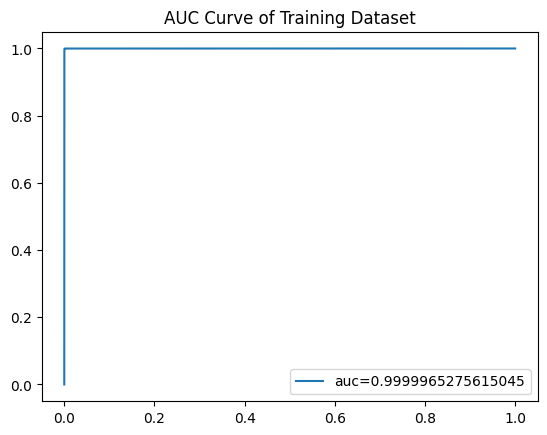

In [233]:
# Plot the AUC Curve on training dataset
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_train,  preds_proba_train_3)

plt.plot(fpr,tpr,label="auc="+str(reg_auc_train_3))
plt.legend(loc=4)
plt.title("AUC Curve of Training Dataset")
plt.show()

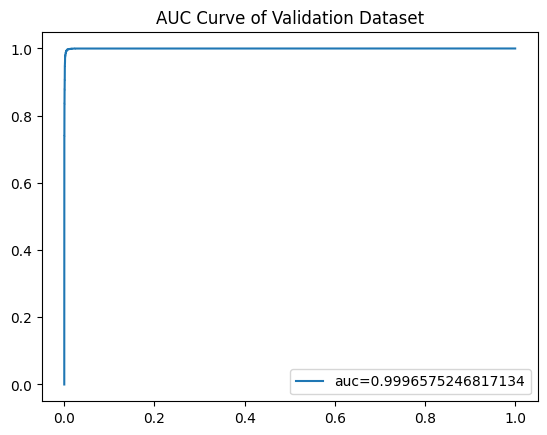

In [234]:
# Plot the AUC Curve on validation dataset
fpr, tpr, _ = metrics.roc_curve(y_val,  preds_proba_val_3)

plt.plot(fpr,tpr,label="auc="+str(reg_auc_val_3))
plt.legend(loc=4)
plt.title("AUC Curve of Validation Dataset")
plt.show()

# 5. Export Submission File

In [235]:
# Open the testing dataset and save as df_test_cleaned
df_test_cleaned = pd.read_csv('../data/raw/advmla-2023-spring/test.csv')

In [236]:
# Split the column player_id from the df_test_cleaned and save as a variable called player_id
player_id = df_test_cleaned.pop('player_id')

In [241]:
# Create a dataframe containing 2 columns: player_id and preds_proba_test. Save as submission
submission = pd.DataFrame({'player_id': player_id, 'drafted': list(preds_proba_test_3)})
submission

,player_id,drafted
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.144444
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.133333
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.255556
3,32402798-471c-4a54-8cb4-29cd95199014,0.111111
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.411111
...,...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,0.266667
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,0.022222
4967,f8df22c4-1602-4fab-896d-8820951aae2f,0.111111
4968,b791c69a-f769-4163-afda-051a6fd20a9d,0.122222


In [242]:
# Save the submission dataframe to the `notebook` folder as a csv file
submission.to_csv('../reports/submission_wk3.csv', index=False)